## 使用GET 抓取頁面資訊

In [3]:
import requests
res = requests.get('https://tw.stock.yahoo.com/q/q?s=2330')
print res

<Response [200]>


## 使用Help 與 dir 查詢套件與函式

In [4]:
import requests
help(requests)


dir(requests)

help(requests.get)
? requests.get

Help on package requests:

NAME
    requests

FILE
    c:\anaconda2\lib\site-packages\requests\__init__.py

DESCRIPTION
    Requests HTTP library
    ~~~~~~~~~~~~~~~~~~~~~
    
    Requests is an HTTP library, written in Python, for human beings. Basic GET
    usage:
    
       >>> import requests
       >>> r = requests.get('https://www.python.org')
       >>> r.status_code
       200
       >>> 'Python is a programming language' in r.content
       True
    
    ... or POST:
    
       >>> payload = dict(key1='value1', key2='value2')
       >>> r = requests.post('http://httpbin.org/post', data=payload)
       >>> print(r.text)
       {
         ...
         "form": {
           "key2": "value2",
           "key1": "value1"
         },
         ...
       }
    
    The other HTTP methods are supported - see `requests.api`. Full documentation
    is at <http://python-requests.org>.
    
    :copyright: (c) 2015 by Kenneth Reitz.
    :license: Apache 2.0, see LICENSE for more details

## 使用POST 取得三大法人買賣超日報資訊

In [7]:
import requests
payload = {
'qdate':'105/05/06',
'select2':'ALL',
'sorting':'by_issue'    
}
res = requests.post('http://www.twse.com.tw/ch/trading/fund/T86/T86.php', data=payload)
#print res.text

## BeautifulSoup 範例

In [9]:
from bs4 import BeautifulSoup 
html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>'''

soup = BeautifulSoup(html_sample, 'html.parser')
print soup.text




Hello World
This is link1
This is link2




## 找出所有含a tag 的HTML 元素

In [10]:
soup = BeautifulSoup(html_sample, 'html.parser') 
alink = soup.select('a') 
print alink


[<a class="link" href="#">This is link1</a>, <a class="link" href="# link2">This is link2</a>]


## 取得含有特定ID的元素

In [11]:
alink = soup.select('#title') 
print alink

[<h1 id="title">Hello World</h1>]


## 取得含有特定class的元素

In [12]:
soup = BeautifulSoup(html_sample, 'html.parser') 
for link in soup.select('.link'): 
    print link

<a class="link" href="#">This is link1</a>
<a class="link" href="# link2">This is link2</a>


## 取得所有a tag 內的連結

In [13]:
alinks = soup.select('a') 
for link in alinks: 
    print link['href']

#
# link2


## 抓取成交價格

In [15]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://tw.stock.yahoo.com/q/q?s=2330')
soup = bs(res.text, 'html.parser')
print soup.select('b')
print soup.select('b')[0].text


[<b>148.0</b>]
148.0


## 使用read_html 讀取表格

In [17]:
table = """
<table> 
    <thead> 
        <tr> 
        <th>Month</th>  
        <th>Savings</th> 
        </tr> 
    </thead> 
    <tbody> 
        <tr> <td>January</td> <td>$100</td></tr> 
        <tr> <td>February</td> <td>$80</td></tr> 
    </tbody> 
    <tfoot> 
        <tr> <td>Sum</td> <td>$180</td> </tr> 
    </tfoot> 
</table>
"""
import pandas as pd
dfs = pd.read_html(table)
dfs[0]


,Month,Savings
0,January,$100
1,February,$80
2,Sum,$180


## 使用read_html 讀取Yahoo 股市表格

In [19]:
import pandas as pd
table =  soup.select('table + table table')[0]
dfs = pd.read_html(table.prettify('utf-8'), encoding= 'utf-8', header=0)
dfs[0]

,股票 代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,最低,個股資料
0,2330台積電 加到投資組合,14:30,148,147.5,148,△0.5,36528,147.5,148.5,148.5,147,成交明細 技術 新聞 基本 籌碼 個股健診
1,凱基證券下單,買 賣 張 零股交易,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print dfs[0]['成交'.decode('utf-8')][0]

148.0


## 抓取三大法人買賣超日報資訊

In [21]:
import requests
payload = {
'qdate':'105/05/06',
'select2':'ALL',
'sorting':'by_issue'    
}

res = requests.post('http://www.twse.com.tw/ch/trading/fund/T86/T86.php', data=payload)
#print res.text

In [27]:
from bs4 import BeautifulSoup as bs
import pandas as pd
soup = bs(res.text, 'html5lib')
tbl = soup.select('#tbl-sortable')[0]
dfs = pd.read_html(tbl.prettify('utf-8'), encoding='utf-8')

In [46]:
stockdf = dfs[0]

In [50]:
stockdf.head()

,證券 代號,證券 名稱,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數
0,00632R,T50反1,350000,391000,-41000,0,5243000,-5243000,65286000,1195000,1030000,165000,72370000,7249000,65121000,60002000
1,042800,永豐EX,0,45000,-45000,0,0,0,9533000,0,0,0,10102000,569000,9533000,9488000
2,2349,錸德,9648000,997000,8651000,0,0,0,0,0,0,0,0,0,0,8651000
3,2345,智邦,2484000,804000,1680000,1854000,0,1854000,509000,472000,66000,406000,182000,79000,103000,4043000
4,03039P,凱基5K,0,0,0,0,0,0,4017000,0,0,0,4349000,332000,4017000,4017000


In [51]:
stockdf.columns

Index([u'證券  代號', u'證券  名稱', u'外資  買進股數', u'外資  賣出股數', u'外資  買賣超股數',
       u'投信  買進股數', u'投信  賣出股數', u'投信  買賣超股數', u'自營商  買賣超股數',
       u'自營商  買進股數  (自行買賣)', u'自營商  賣出股數  (自行買賣)', u'自營商  買賣超股數  (自行買賣)',
       u'自營商  買進股數  (避險)', u'自營商  賣出股數  (避險)', u'自營商  買賣超股數  (避險)',
       u'三大法人  買賣超股數'],
      dtype='object')

## 猜猜哪隻股票外資買賣超最多?

In [54]:
stockdf[stockdf['外資  買賣超股數'.decode('utf-8')]==stockdf['外資  買賣超股數'.decode('utf-8')].max()]

,證券 代號,證券 名稱,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數
2,2349,錸德,9648000,997000,8651000,0,0,0,0,0,0,0,0,0,0,8651000


## 根據買賣超排序

In [56]:
stockdf.sort_values( by= '外資  買賣超股數'.decode('utf-8'), ascending=False).head()

,證券 代號,證券 名稱,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數
2,2349,錸德,9648000,997000,8651000,0,0,0,0,0,0,0,0,0,0,8651000
6,3023,信邦,4756000,1194000,3562000,214000,0,214000,-164000,118000,348000,-230000,340000,274000,66000,3612000
18,1312,國喬,3830000,713000,3117000,0,1326000,-1326000,198000,75000,0,75000,249000,126000,123000,1989000
5,1605,華新,3451000,1257000,2194000,1500000,0,1500000,-61000,1000,100000,-99000,210000,172000,38000,3633000
14,3474,華亞科,5865836,3726000,2139836,0,0,0,-4000,0,0,0,0,4000,-4000,2135836


## 定義函式

In [71]:
def getTradingVolume(date):
    payload['qdate'] = date
    res = requests.post('http://www.twse.com.tw/ch/trading/fund/T86/T86.php', data=payload)
    soup = bs(res.text, 'html5lib')
    tbl = soup.select('#tbl-sortable')[0]
    dfs = pd.read_html(tbl.prettify('utf-8'), encoding='utf-8')
    stockdf = dfs[0]
    return stockdf

## 時間跟字串轉換

In [58]:
from datetime import date,datetime 
currenttime = datetime.now() 
print currenttime.strftime("%Y-%m-%d") 


a = '2014-05-03 14:00' 
print datetime.strptime(a, "%Y-%m-%d %H:%M")

2016-05-08
2014-05-03 14:00:00


## 產生日期

In [63]:
from datetime import date,datetime, timedelta 
currenttime = datetime.now() 
for i in range(1,3):
    dt = currenttime - timedelta(days = i) 
    print dt
    print dt.strftime('%Y/%m/%d')

2016-05-07 00:52:46.981000
2016/05/07
2016-05-06 00:52:46.981000
2016/05/06


## 產生民國日期

In [64]:
from datetime import date,datetime, timedelta 
currenttime = datetime.now() 
for i in range(1,3):
    dt = currenttime - timedelta(days = i) 
    year = int(dt.strftime('%Y')) - 1911
    monthdate = dt.strftime('%m/%d')
    print '{}/{}'.format(year, monthdate)

105/05/07
105/05/06


## 增加日期轉換函式

In [90]:
def getTWDate(dt):
    year = int(dt.strftime('%Y')) - 1911
    monthdate = dt.strftime('%m/%d')
    ymd = '{}/{}'.format(year, monthdate)
    return ymd

## 修改原本函式

In [96]:
def getTradingVolume(dt):
    payload['qdate'] = getTWDate(dt)
    res = requests.post('http://www.twse.com.tw/ch/trading/fund/T86/T86.php', data=payload)
    soup = bs(res.text, 'html5lib')
    tbl = soup.select('#tbl-sortable')[0]
    dfs = pd.read_html(tbl.prettify('utf-8'), encoding='utf-8')
    stockdf = dfs[0]
    stockdf['ymd'] = dt
    return stockdf

## 批次執行30天的資料

In [97]:
payload['select2'] = '24'

dfs = []
currenttime = datetime.now() 
for i in range(1,30):
    dt = currenttime.date() - timedelta(days = i) 
    dfs.append(getTradingVolume(dt))
    print dt,

2016-05-07 2016-05-06 2016-05-05 2016-05-04 2016-05-03 2016-05-02 2016-05-01 2016-04-30 2016-04-29 2016-04-28 2016-04-27 2016-04-26 2016-04-25 2016-04-24 2016-04-23 2016-04-22 2016-04-21 2016-04-20 2016-04-19 2016-04-18 2016-04-17 2016-04-16 2016-04-15 2016-04-14 2016-04-13 2016-04-12 2016-04-11 2016-04-10 2016-04-09


## 合併所有的Data Frame

In [98]:
stockdf = pd.concat(dfs, ignore_index=True)
len(stockdf)

1336

In [99]:
stockdf.head()

,證券 代號,證券 名稱,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數,ymd
0,3474,華亞科,5865836,3726000,2139836,0,0,0,-4000,0,0,0,0,4000,-4000,2135836,2016-05-06
1,2408,南亞科,2755000,1194000,1561000,0,0,0,104000,1000,0,1000,106000,3000,103000,1665000,2016-05-06
2,2449,京元電,6490000,5054000,1436000,144000,443000,-299000,131000,42000,77000,-35000,509000,343000,166000,1268000,2016-05-06
3,2458,義隆,818000,289000,529000,0,0,0,-46000,12000,34000,-22000,63000,87000,-24000,483000,2016-05-06
4,3545,敦泰,604000,176000,428000,0,0,0,-6000,0,4000,-4000,12000,14000,-2000,422000,2016-05-06


## 篩選出台積電股票

In [102]:
stockdf[stockdf['證券  代號'.decode('utf-8')] == 2330].head()

,證券 代號,證券 名稱,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數,ymd
66,2330,台積電,30192917,36329176,-6136259,11000,19000,-8000,123000,270000,202000,68000,337000,282000,55000,-6021259,2016-05-06
137,2330,台積電,23891785,37758202,-13866417,127000,53000,74000,1451000,1437000,98000,1339000,307000,195000,112000,-12341417,2016-05-05
209,2330,台積電,23512540,50354331,-26841791,10000,165000,-155000,1010000,1045000,37000,1008000,404000,402000,2000,-25986791,2016-05-04
278,2330,台積電,16652487,63959515,-47307028,7000,380000,-373000,2474000,2046000,206000,1840000,989000,355000,634000,-45206028,2016-05-03
349,2330,台積電,37765618,66262467,-28496849,0,1187000,-1187000,2040000,1379000,111000,1268000,1120000,348000,772000,-27643849,2016-04-29


In [104]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


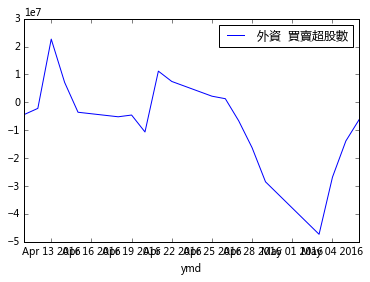

In [109]:
df2330 =stockdf[stockdf['證券  代號'.decode('utf-8')] == 2330]
df2330.plot.line(x = 'ymd', y= '外資  買賣超股數'.decode('utf-8') )


## 使用Pandas 將資料塞進資料庫

In [110]:
import sqlite3 as lite
with lite.connect('finance.sqlite') as db:
    stockdf.to_sql(name='trading_volume', index=False, con=db, if_exists='replace')


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  app.launch_new_instance()


## 使用Pandas 下SQL 查詢資料

In [111]:
import sqlite3 as lite
with lite.connect('finance.sqlite') as db:
    df = pd.read_sql_query('SELECT count(1) FROM trading_volume;', db)
df 


,count(1)
0,1336
